Text(0.5, 1.0, 'Step to Accuracy')

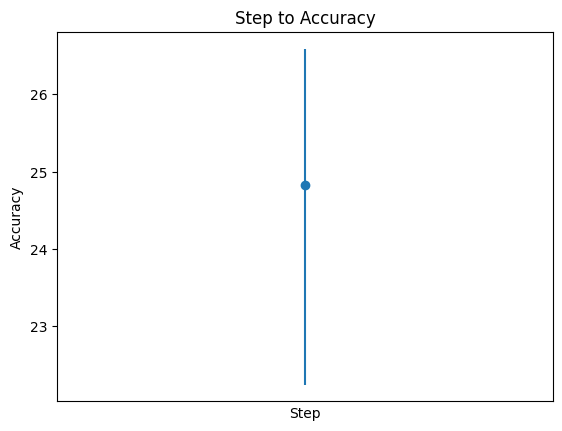

In [1]:
import statistics
import matplotlib.pyplot as plt
import json
SAVE_PATH = "synthetic_summarization_OPRO_results.json"

# load opro.json
with open(SAVE_PATH) as f:
    opro_results = json.load(f)

# opro = {step:dict(sorted(opro[step].items(), key=lambda x: x[1], reverse=True)[:20]) for step in opro}
step_to_accuracy = {
    step: (
        statistics.mean(opro_results[step].values()),
        max(opro_results[step].values()),
        min(opro_results[step].values()),
    )
    for step in opro_results
}

# # Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
# fig, ax = plt.subplots()
# ax.errorbar(
#     step_to_accuracy.keys(),
#     [accuracy[0] for accuracy in step_to_accuracy.values()],
#     yerr=[accuracy[1] for accuracy in step_to_accuracy.values()],
#     fmt="o",
# )

# Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
fig, ax = plt.subplots()
ax.errorbar(
    step_to_accuracy.keys(),
    [accuracy[0] for accuracy in step_to_accuracy.values()],
    yerr=[
        [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
        [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
    ],
    fmt="o",
)

ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
ax.set_xlabel("Step")
ax.set_ylabel("Accuracy")
ax.set_title("Step to Accuracy")

In [2]:
for step in opro_results:
    print(list(opro_results[step].items())[0])

('Please summarize the following text: {TEXT}. Be concise and clear.', 26.591789320078995)


In [7]:
opro_results[str(len(opro_results))]

{'**Instruction**: Summarize the following text:\n\n**{TEXT}**\n\n**Example:**\n\n* Summarize the following text:\n> The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.\n\n### Answer: ###\n* The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.\n\n**Additional Instructions:**\n\n* Please ensure that your summary captures the key points of the text.\n* Use clear and concise language.\n* You MUST adhere to the specified word limit.\n* You will be penalized if your summary is not responsive to the text.': 57.20792197129059,
 '**Optimal Summary Creation Framework**\n\n#### Directive:\n\nCraft a brief yet thorough summary of the specified text.\n\n#### Text for Summary:\n{TEXT

In [5]:
best_instruction = max(
    opro_results[str(len(opro_results))], key=opro_results[str(len(opro_results))].get
)
print(best_instruction)

**Instruction**: Summarize the following text:

**{TEXT}**

**Example:**

* Summarize the following text:
> The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.

### Answer: ###
* The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.

**Additional Instructions:**

* Please ensure that your summary captures the key points of the text.
* Use clear and concise language.
* You MUST adhere to the specified word limit.
* You will be penalized if your summary is not responsive to the text.
